### Fuzzy Expert Systems

Fuzzy Logic -- vague/ambiguous
1. fuzzy thinking: 
2. fuzzy set:
3. linguistic variables & hedges:
4. Ops of fuzzy sets
5. fuzzy rules:

In [1]:
pip install -U scikit-fuzzy

Requirement already up-to-date: scikit-fuzzy in c:\programdata\anaconda3\lib\site-packages (0.4.2)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import skfuzzy as fuzz

In [4]:
from skfuzzy import control as ctrl

# input/output
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

# Auto-membership function population is possible with .automf(3, 5, or 7)
quality.automf(5)
service.automf(5)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


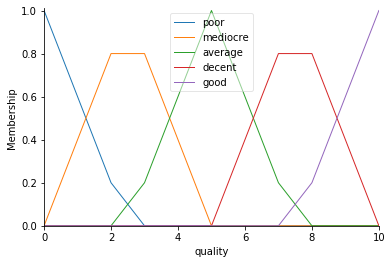

In [5]:
quality.view()

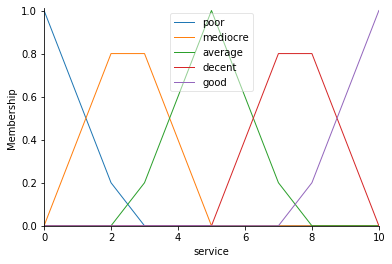

In [6]:
service.view()

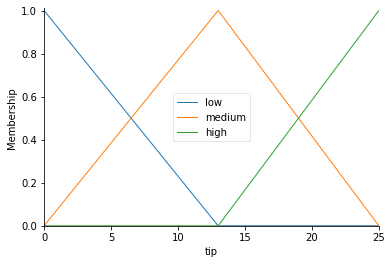

In [7]:
tip.view()

In [8]:
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xccafcd3b88>)

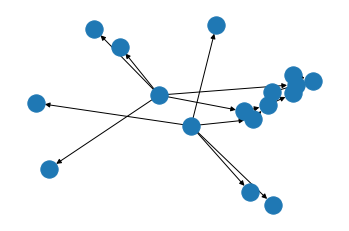

In [9]:
rule1.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xccb0d76588>)

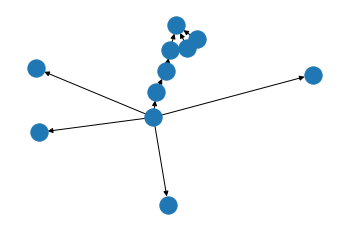

In [10]:
rule2.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xccb0db1e48>)

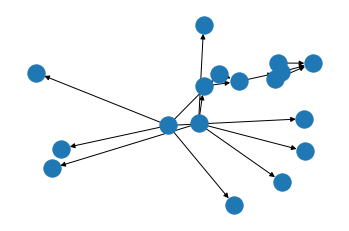

In [11]:
rule3.view()

In [12]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

In [13]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [18]:
tipping.input['quality'] = 0.0
tipping.input['service'] = 3.4

# Crunch the numbers
tipping.compute()

9.330076566448605


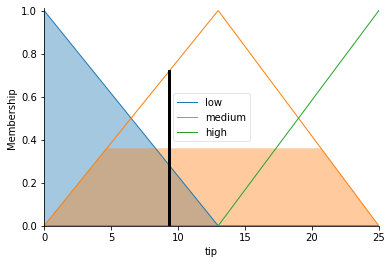

In [19]:
print(tipping.output['tip'])
tip.view(sim=tipping)